<a href="https://colab.research.google.com/github/Jaewon45/ESAA_2022/blob/main/0905_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 분류 연습 문제**
___
출처 : 핸즈온 머신러닝 Ch03 분류 연습문제 1, 2번

In [1]:
# import data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

In [2]:
X, y = mnist["data"], mnist["target"]

### **1. MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요.**
___

1. `KNeghtborsClassifier`를 사용하는 것을 추천합니다. 
2. `weights`와 `n_neighbors` 하이퍼 파라미터로 그리드 탐색을 시도하여, 좋은 하이퍼 파라미터 값을 찾아보세요.

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
# import package
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [8]:
# Try GridSearch to optimize hyperparameter
param_grid = [{'weights': ["uniform","distance"], 'n_neighbors': [3, 4]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  38.2s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  35.4s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  36.2s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  35.4s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  35.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  36.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  35.2s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  36.1s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  38.5s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  43.4s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  52.7s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=3)

In [9]:
# best hyperparameter
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [10]:
# best score
grid_search.best_score_

0.9716166666666666

In [17]:
# model test
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

### **2. 다음 단계를 따라 인위적으로 훈련 세트를 늘리는 데이터 증식 또는 훈련 세트 확장 기법을 연습해봅시다.**
___

#### **STEP 1. MNIST 이미지를 (왼, 오른, 위, 아래) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어 보세요.**

In [43]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage.interpolation import shift

In [25]:
# 1. imutils 이용
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

def shift_image(image, x, y):
    image = image.reshape((28, 28))
    shifted_image = imutils.translate(image, x, y)
    plot_digit(shifted_image)
    return shifted_image.reshape([-1])

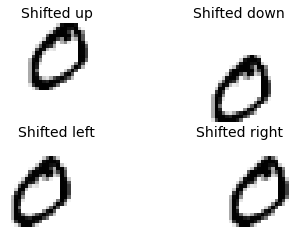

In [28]:
image = X_train[1]

plt.subplot(221)
plt.title("Shifted up", fontsize=14)
shifted_image_up = shift_image(image, 0, -5)
plt.subplot(222)
plt.title("Shifted down", fontsize=14)
shifted_image_down = shift_image(image, 0, 5)
plt.subplot(223)
plt.title("Shifted left", fontsize=14)
shifted_image_left = shift_image(image, -5, 0)
plt.subplot(224)
plt.title("Shifted right", fontsize=14)
shifted_image_right = shift_image(image, 5, 0)

plt.show()

In [40]:
# 2. shift 이용
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

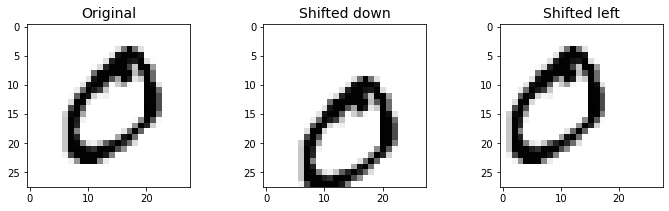

In [44]:
image = X_train[1]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

####  **STEP 2. 앞에서 만든 함수를 이용하여, 훈련 세트에 있는 각 이미지에 대해 네 개의 이동된 복사본(방향마다 한 개씩)을 만들어 훈련 세트에 추가하세요**

In [45]:
X_train_added = [image for image in X_train]
y_train_added = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_added.append(shift_image(image, dx, dy))
        y_train_added.append(label)

X_train_added = np.array(X_train_added)
y_train_added = np.array(y_train_added)
print(X_train.shape, X_train_added.shape)
print(y_train.shape, y_train_added.shape)

(60000, 784) (300000, 784)
(60000,) (300000,)


In [ ]:
  X_train_added.append(shift_image(image, 1, 0))
  y_train_added.append(label)
  X_train_added.append(shift_image(image, 0, 1))
  y_train_added.append(label)
  X_train_added.append(shift_image(image, 0, -1))
  y_train_added.append(label)

X_train_added = np.array(X_train_added)
y_train_added = np.array(y_train_added)

####  **STEP 3. 위에서 확장한 데이터셋을 이용하여, 1번 문제에서 찾은 최적 모델을 훈련시키고, 테스트 세트에서 정확도를 측정해보세요**

In [48]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train_added, y_train_added)
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763